<a href="https://colab.research.google.com/github/Sreelakshmim6/CE888/blob/main/distilbert_uncased.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#
 Citation :[1] https://arxiv.org/pdf/2004.10703.pdf
            [2] https://www.kaggle.com/sudalairajkumar getting-started-with-text-preprocessing

In [46]:
#importing all required libraries
import urllib.request
import csv
import numpy as np
import pandas as pd
import string
import nltk
import re
from sklearn.metrics import f1_score


In [2]:
#function for loading files 
def import_data(task,tag):
  l = f"https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/{task}/{tag}.txt"
  with urllib.request.urlopen(l) as f:   
    html_1 = f.read().decode('utf-8').split("\n")
  t=pd.DataFrame(html_1)
  #t = t[~(t[0]=='')]
  return t

In [3]:
pip install WordCloud

# **HATE DATASET**

In [4]:
labels=[]
mapping_link = f"https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/hate/mapping.txt"
with urllib.request.urlopen(mapping_link) as f:
    html = f.read().decode('utf-8').split("\n")
    csvreader = csv.reader(html, delimiter='\t')
labels = [row[1] for row in csvreader if len(row) > 1]

Loading Hate Train,Test and Validation data for HATE

In [47]:
    
Hate_Train_labels_df=import_data("hate","train_labels")
#print(Hate_Train_labels_df.shape)
Hate_Train_text_df=import_data("hate","train_text")
#print(Hate_Train_text_df.tail)

Hate_Test_label_df=import_data("hate","test_labels")
Hate_Test_text_df=import_data("hate","test_text")

hate_val_text=import_data("hate","val_text")
hate_val_labels=import_data("hate","val_labels")

Hate_Train_labels_df.shape,Hate_Train_text_df.shape,Hate_Test_label_df.shape,Hate_Test_text_df.shape



((9001, 1), (9001, 1), (2971, 1), (2971, 1))

In [6]:
import matplotlib.pyplot as plt


In [7]:
#function to generate a word cloud
def wordclouds(d):
  t =  " ".join(review for review in d)
  from wordcloud import WordCloud #, STOPWORDS, ImageColorGenerator

  # Create and generate a word cloud image:
  wordcloud = WordCloud().generate(t)

  # Display the generated image:
  plt.figure(figsize=[10,5])
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()


**Preprocessing**

In [8]:
pip install unicode # have to be in a separate line


In [9]:
pip install emoji --upgrade # have to be in a separate line


Requirement already up-to-date: emoji in /usr/local/lib/python3.7/dist-packages (1.2.0)


In [10]:
from emoji import UNICODE_EMOJI
import emoji
nltk.download('wordnet')
# function to remove "@user" as this is not required 
user="@user"
def remove_user(text):
    return " ".join([word for word in str(text).split() if word not in user])
#-----------------------------------------------------------------------------------------------
nltk.download("stopwords")
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english')) #downloading stopwords in english and saving them in a varible 

#function to remove stopwords
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
#-----------------------------------------------------------------------------------------------
#function to remove punctuations and other symbols
PUNCT_TO_REMOVE ="/-'?!.,#$%\'()*+-/:;<=>@[\\]^_`{|}~" + '""“”’' + '∞θ÷α•à−β∅³π‘₹´°£€\×™√²—–&'
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))
#-----------------------------------------------------------------------------------------------
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
#function to perform lemmatization using WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])
#-----------------------------------------------------------------------------------------------


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
#function to call all preprocessing steps
def preprocess_data(df):
  df=df.str.lower()
  df=df.apply(lambda x: emoji.demojize(x)) #converting emojis to text
  df=df.apply(lambda x: re.sub(r"http:\S+",'',x)) #removing urls
  df=df.apply(lambda text: remove_user(text)) # removing @user
  df=df.apply(lambda text: remove_punctuation(text)) # removing punctuation
  df=df.apply(lambda text: remove_stopwords(text)) # removing stopwords
  df=df.apply(lambda text: lemmatize_words(text)) # word lemmatization
  return df

In [48]:
#preprocessing data
clean_test=preprocess_data(Hate_Test_text_df[0])
clean_train=preprocess_data(Hate_Train_text_df[0])


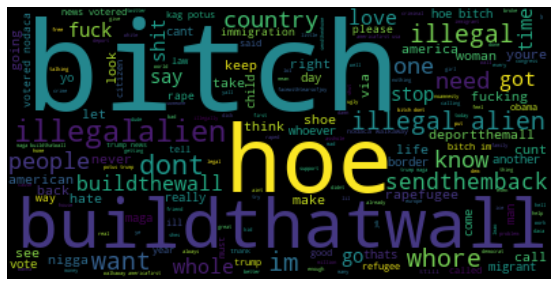

In [13]:
wordclouds(clean_test)

In [12]:
pip install ktrain

     |████████████████████████████████| 25.3MB 131kB/s 
     |████████████████████████████████| 6.8MB 54.1MB/s 
     |████████████████████████████████| 983kB 48.7MB/s 
     |████████████████████████████████| 266kB 54.2MB/s 
     |████████████████████████████████| 1.9MB 51.5MB/s 
     |████████████████████████████████| 1.2MB 49.0MB/s 
     |████████████████████████████████| 471kB 46.3MB/s 
     |████████████████████████████████| 3.3MB 50.6MB/s 
     |████████████████████████████████| 901kB 46.0MB/s 
  Created wheel for ktrain: filename=ktrain-0.26.2-cp37-none-any.whl size=25277794 sha256=693b238000fb2c919ab177c20e106692b346f1cf319962aef0cd480b4a376bcc
  Stored in directory: /root/.cache/pip/wheels/67/2e/f1/c72afa08df8b2d984b910dea228902ce81dae4511afe9fafd2
  Created wheel for langdetect: filename=langdetect-1.0.8-cp37-none-any.whl size=993193 sha256=a60f94655c7cdaa25c5fd2baffc850ea657959194b79edeadbbef6f7ceb2d1f4
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d4

In [12]:
#parameters to set for our model

%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os 
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [13]:
import ktrain
from ktrain import text

In [49]:
# converting train and test to a list
x_train=clean_train.tolist()
y_train=Hate_Train_labels_df[0].tolist()
x_test=clean_test.tolist()
y_test=Hate_Test_label_df[0].tolist()

In [50]:
x_test[2970] # last element of the list found to be empty

''

In [51]:
#removing empty cells from all lists
x_train=x_train[:9000]
y_train=y_train[:9000]
x_test=x_test[:2970]
y_test=y_test[:2970]

DistilBert Model 

In [52]:
labels1=[0,1]
model_name='distilbert-base-uncased'  # DistlBERT model 
#transformer for the model with maximum tokenize length as 512, labels1 are (0,1)
trans= text.Transformer(model_name,maxlen=512,class_names=labels1) 

In [53]:
#preparing the data 
train_data=trans.preprocess_train(x_train,y_train) # x_train and y_train are passed at the same time
test_data=trans.preprocess_test(x_test,y_test) # x_test and y_test are passed at the same time

preprocessing train...
language: en
train sequence lengths:
	mean : 12
	95percentile : 25
	99percentile : 29


/usr/local/lib/python3.7/dist-packages/ktrain/utils.py:589: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  if self.get_classes(): warnings.warn('class_names argument was ignored, as they were extracted from string labels in dataset')


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 12
	95percentile : 25
	99percentile : 28


In [25]:
train_data[1] # checking the format of the processed data

(array([[[  101,  2450, 21746, ...,     0,     0,     0],
         [    1,     1,     1, ...,     0,     0,     0],
         [    0,     0,     0, ...,     0,     0,     0]]]),
 array([[0., 1.]], dtype=float32))

In [22]:
test_data[4]  # checking the format of the processed data

(array([[[  101,  7324,  2132,  4604,  5592,  5058,  3566,  2160, 12873,
          14202,  2100,  4743,  7743,  2004,  7570,  2063,   102,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0],
         [    1,     1,     1,     1,     1,     1,     1,     1,     1,
              1,     1,     1,     1,     1,     1,     1,     1,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,
     

In [54]:
model=trans.get_classifier() # classifier for DistlBERT

In [64]:
#if this line throws an error, please use batch_size=8
learner=ktrain.get_learner(model,train_data=train_data,val_data=test_data,batch_size=16) # learner instance of DistlBERT

simulating training for different learning rates... this may take a few moments...
Epoch 1/5
562/562 [==============================] - 508s 886ms/step - loss: 0.6828 - accuracy: 0.5937
Epoch 2/5
562/562 [==============================] - 500s 890ms/step - loss: 0.5518 - accuracy: 0.7203
Epoch 3/5
562/562 [==============================] - 498s 886ms/step - loss: 0.5985 - accuracy: 0.6721
Epoch 4/5
562/562 [==============================] - 492s 875ms/step - loss: 1.0752 - accuracy: 0.5566
Epoch 5/5
562/562 [==============================] - 488s 868ms/step - loss: 0.7388 - accuracy: 0.5533


done.
Visually inspect loss plot and select learning rate associated with falling loss


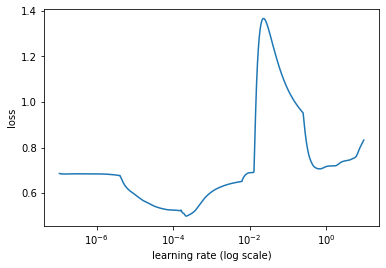

In [41]:
#checking the best learning rate
learner.lr_find(show_plot=True,max_epochs=5) #best learning rate found to be 1e-4

In [66]:
#fitting the model
learner.fit_onecycle(1e-4,2) #learning rate-1e-4 , no. of epochs-2



begin training using onecycle policy with max lr of 0.001...
Epoch 1/2
1125/1125 [==============================] - 734s 650ms/step - loss: 0.5442 - accuracy: 0.7530 - val_loss: 1.0931 - val_accuracy: 0.4572
Epoch 2/2
1125/1125 [==============================] - 734s 650ms/step - loss: 0.5882 - accuracy: 0.7267 - val_loss: 1.0020 - val_accuracy: 0.4603


In [57]:
#validating the model- outputs precision,recall,f1_score and confusion matrix
learner.validate()

              precision    recall  f1-score   support

           0       0.79      0.15      0.25      1718
           1       0.45      0.95      0.61      1252

    accuracy                           0.48      2970
   macro avg       0.62      0.55      0.43      2970
weighted avg       0.64      0.48      0.40      2970



array([[ 254, 1464],
       [  68, 1184]])

VALIDATION SET - HATE

In [22]:
#library for f1 score
from sklearn.metrics import f1_score


In [24]:
#cleaning the validation data
clean_val_h=preprocess_data(hate_val_text[0])
pred_hate=[] #list to store predictor variable
#getting the predictor for our learner
predictor=ktrain.get_predictor(learner.model, preproc=trans)
#predicting output
for x in clean_val_h:
  pred_hate.append(predictor.predict(x))

f1_score(hate_val_labels,pred_hate, average='macro') #output : 0.5017735481413309


0.5017735481413309

## **OFFENSIVE DATASET**

Loading Hate Train,Test and Validation data for OFFENSIVE

In [15]:
#loading data-train,test and validation
Off_Train_labels_df=import_data("offensive","train_labels")
Off_Train_text_df=import_data("offensive","train_text")

Off_Test_label_df=import_data("offensive","test_labels")
Off_Test_text_df=import_data("offensive","test_text")
labels=import_data("offensive","mapping")

off_val_text=import_data("offensive","val_text")
off_val_labels=import_data("offensive","val_labels")

In [16]:
#cleaning data
clean_test_off=preprocess_data(Off_Test_text_df[0])
clean_train_off=preprocess_data(Off_Train_text_df[0])

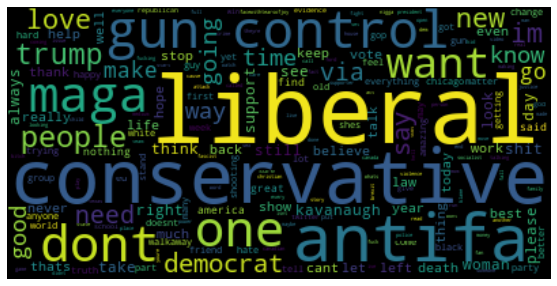

In [44]:
wordclouds(clean_test_off)

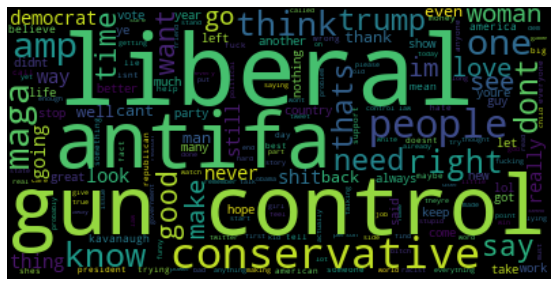

In [45]:
wordclouds(clean_train_off)

In [17]:
#converting all the data to list format
x_train_off=clean_train_off.tolist()
y_train_off=Off_Train_labels_df[0].tolist()
x_test_off=clean_test_off.tolist()
y_test_off=Off_Test_label_df[0].tolist()

In [18]:
len(x_train_off),len(x_test_off)

(11917, 861)

In [19]:
#last cell found to be null
x_test_off[860]

''

In [20]:
#removing empty cells
x_train_off=x_train_off[:11916]
y_train_off=y_train_off[:11916]
x_test_off=x_test_off[:860]
y_test_off=y_test_off[:860]

In [21]:
labels1=[0,1] #binary classification

In [22]:
#preparing data for our model
train_data=trans.preprocess_train(x_train_off,y_train_off)
test_data=trans.preprocess_test(x_test_off,y_test_off)

preprocessing train...
language: en
train sequence lengths:
	mean : 11
	95percentile : 26
	99percentile : 30


/usr/local/lib/python3.7/dist-packages/ktrain/utils.py:589: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  if self.get_classes(): warnings.warn('class_names argument was ignored, as they were extracted from string labels in dataset')


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 13
	95percentile : 26
	99percentile : 29


In [26]:
model=trans.get_classifier() # classifier for DistlBERT
learner=ktrain.get_learner(model,train_data=train_data,val_data=test_data,batch_size=8)# classifier for DistlBERT
learner.fit_onecycle(1e-5,2) #fitting the model with learning rate-1e-5 , no. of epochs-2



begin training using onecycle policy with max lr of 1e-05...
1490/1490 [==============================] - 966s 642ms/step - loss: 0.5785 - accuracy: 0.7128 - val_loss: 0.3957 - val_accuracy: 0.8372


In [27]:
learner.validate() # validating the model

              precision    recall  f1-score   support

           0       0.86      0.93      0.89       620
           1       0.77      0.60      0.67       240

    accuracy                           0.84       860
   macro avg       0.81      0.76      0.78       860
weighted avg       0.83      0.84      0.83       860



array([[577,  43],
       [ 97, 143]])

Evaluating Validation - OFFENSIVE

In [32]:
clean_val_o=preprocess_data(off_val_text[0]) #preprocessing val data
pred_off=[]
predictor_off=ktrain.get_predictor(learner.model, preproc=trans) #predictor for the model

for x in clean_val_o:
  pred_off.append(predictor_off.predict(x))#predicting output for val data

f1_score(off_val_labels,pred_off, average='macro')# output : 0.5086268277539489


0.5086268277539489

simulating training for different learning rates... this may take a few moments...
Epoch 1/5
744/744 [==============================] - 660s 884ms/step - loss: 0.1217 - accuracy: 0.9642
Epoch 2/5
744/744 [==============================] - 660s 887ms/step - loss: 0.1370 - accuracy: 0.9518
Epoch 3/5
744/744 [==============================] - 237s 318ms/step - loss: 0.3923 - accuracy: 0.8211


done.
Visually inspect loss plot and select learning rate associated with falling loss


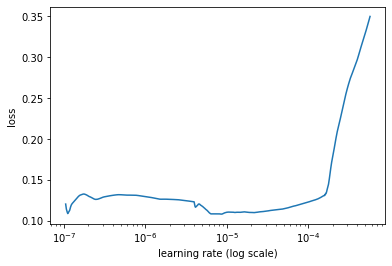

In [48]:
learner.lr_find(show_plot=True,max_epochs=5) #best learning rate found to be 1e-5

# **IRONY DATASET**

Loading Hate Train,Test and Validation data for IRONY

In [33]:
    
irony_Train_labels_df=import_data("irony","train_labels")
#print(Hate_Train_labels_df.shape)
irony_Train_text_df=import_data("irony","train_text")
#print(Hate_Train_text_df.tail)

irony_Test_label_df=import_data("irony","test_labels")
irony_Test_text_df=import_data("irony","test_text")
labels=import_data("irony","mapping")

irony_val_text=import_data("irony","val_text")
irony_val_labels=import_data("irony","val_labels")

In [34]:
#preprocessing data
clean_test_irony=preprocess_data(irony_Test_text_df[0])
clean_train_irony=preprocess_data(irony_Train_text_df[0])

In [35]:
#converting all data to lists
x_train_irony=clean_train_irony.tolist()
y_train_irony=irony_Train_labels_df[0].tolist()
x_test_irony=clean_test_irony.tolist()
y_test_irony=irony_Test_label_df[0].tolist()


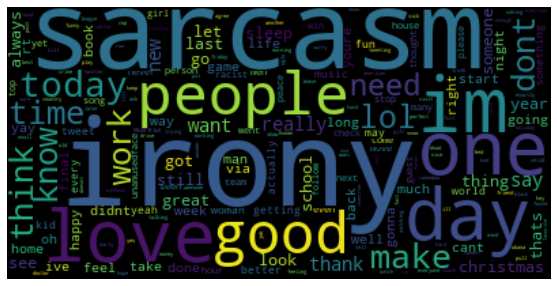

In [49]:
wordclouds(clean_test_irony)

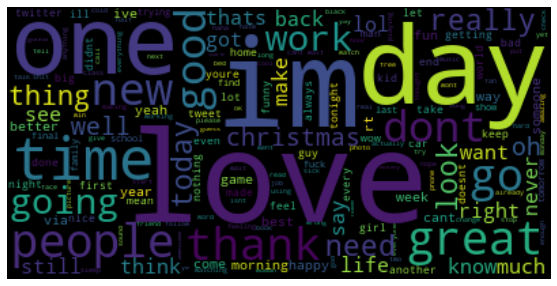

In [50]:
wordclouds(clean_train_irony)

In [11]:
len(x_train_irony),len(x_test_irony)


(2863, 785)

In [36]:
#removing the empty cell from the data
x_train_irony=x_train_irony[:2862]
y_train_irony=y_train_irony[:2862]
x_test_irony=x_test_irony[:784]
y_test_irony=y_test_irony[:784]
labels2=[0,1] # labels are 0 and 1

In [37]:
model_name='distilbert-base-uncased'
trans= text.Transformer(model_name,maxlen=512,class_names=labels2) #transformer for the model

In [38]:
#preparing data for our model
train_data=trans.preprocess_train(x_train_irony,y_train_irony)
test_data=trans.preprocess_test(x_test_irony,y_test_irony)


preprocessing train...
language: en
train sequence lengths:
	mean : 8
	95percentile : 13
	99percentile : 16


/usr/local/lib/python3.7/dist-packages/ktrain/utils.py:589: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  if self.get_classes(): warnings.warn('class_names argument was ignored, as they were extracted from string labels in dataset')


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 8
	95percentile : 14
	99percentile : 17


In [39]:
model=trans.get_classifier() # classifier for the model
learner=ktrain.get_learner(model,train_data=train_data,val_data=test_data,batch_size=8)#learner for the model


simulating training for different learning rates... this may take a few moments...
Epoch 1/5
178/178 [==============================] - 160s 857ms/step - loss: 0.6946 - accuracy: 0.4933
Epoch 2/5
178/178 [==============================] - 158s 887ms/step - loss: 0.6919 - accuracy: 0.5112
Epoch 3/5
178/178 [==============================] - 158s 886ms/step - loss: 0.7029 - accuracy: 0.5291
Epoch 4/5
178/178 [==============================] - 156s 876ms/step - loss: 0.7262 - accuracy: 0.5043
Epoch 5/5
178/178 [==============================] - 51s 283ms/step - loss: 255.4458 - accuracy: 0.4979


done.
Visually inspect loss plot and select learning rate associated with falling loss


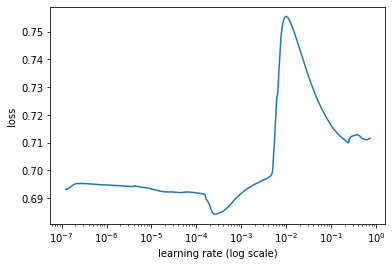

In [69]:
learner.lr_find(show_plot=True,max_epochs=5) #best learning rate found to be 1e-4

In [40]:
learner.fit_onecycle(1e-4,3) # fitting the model withlearning rate-1e-4 , no. of epochs-3



begin training using onecycle policy with max lr of 0.0001...
Epoch 1/3
358/358 [==============================] - 241s 651ms/step - loss: 0.6868 - accuracy: 0.5483 - val_loss: 0.6587 - val_accuracy: 0.6186
Epoch 2/3
358/358 [==============================] - 232s 647ms/step - loss: 0.6570 - accuracy: 0.6010 - val_loss: 0.6568 - val_accuracy: 0.6314
Epoch 3/3
358/358 [==============================] - 232s 647ms/step - loss: 0.5189 - accuracy: 0.7557 - val_loss: 0.6788 - val_accuracy: 0.6429


In [41]:
learner.validate() #validating the model

              precision    recall  f1-score   support

           0       0.76      0.60      0.67       473
           1       0.54      0.71      0.61       311

    accuracy                           0.64       784
   macro avg       0.65      0.65      0.64       784
weighted avg       0.67      0.64      0.65       784



array([[283, 190],
       [ 90, 221]])

In [ ]:
#to view the top wrongly labelled tweets -  
learner.view_top_losses ( )


Evaluating Validation set - IRONY

In [43]:
clean_val_i=preprocess_data(irony_val_text[0]) #preprocessing val data

In [44]:
pred_irony=[]
predictor_irony=ktrain.get_predictor(learner.model, preproc=trans)#predictor for the model

for x in clean_val_i:
  pred_irony.append(predictor_irony.predict(x))#predicting output for val data

In [45]:
f1_score(irony_val_labels,pred_irony, average='macro') # output : 0.43258216517813136


0.43258216517813136